## 路透社新闻分类：Multiclass Classification Problem

In [2]:
import tensorflow as tf
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

/Users/dongdongdongdong/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


2113536/2110848 [==============================] - 119s 56us/step


In [4]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((8982,), (8982,), (2246,), (2246,))

#### 👇数据预处理

In [9]:
import numpy as np

# 数据向量化
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

# 标签向量化
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.0
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [10]:
# 也可用Keras自带的One-hot Encoding方法：
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

#### 👇构建模型

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(46, activation='softmax')])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### 👇留出验证集

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

#### 👇训练模型

In [13]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,
                    validation_data = [x_val, y_val])

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 126us/sample - loss: 2.4413 - accuracy: 0.5277 - val_loss: 1.6395 - val_accuracy: 0.6510
Epoch 2/20
7982/7982 [==============================] - 1s 75us/sample - loss: 1.3656 - accuracy: 0.7086 - val_loss: 1.2727 - val_accuracy: 0.7270
Epoch 3/20
7982/7982 [==============================] - 1s 74us/sample - loss: 1.0241 - accuracy: 0.7814 - val_loss: 1.1175 - val_accuracy: 0.7510
Epoch 4/20
7982/7982 [==============================] - 1s 71us/sample - loss: 0.8063 - accuracy: 0.8287 - val_loss: 1.0376 - val_accuracy: 0.7770
Epoch 5/20
7982/7982 [==============================] - 1s 75us/sample - loss: 0.6377 - accuracy: 0.8663 - val_loss: 0.9487 - val_accuracy: 0.8020
Epoch 6/20
7982/7982 [==============================] - 1s 74us/sample - loss: 0.5061 - accuracy: 0.8959 - val_loss: 0.9075 - val_accuracy: 0.8100
Epoch 7/20
7982/7982 [==============================] - 1s 72us/sampl

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### 👇绘制 training loss 和 validation loss 曲线

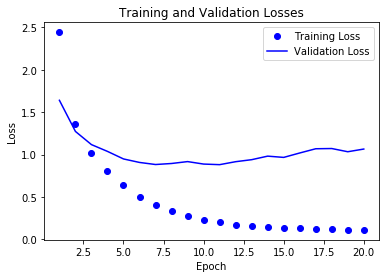

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

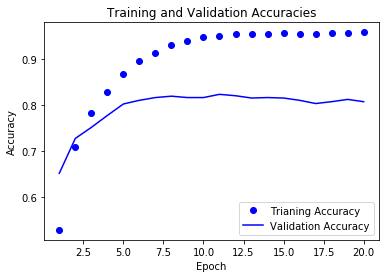

In [18]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Trianing Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### 🔍：从第9个epoch开始出现过拟合

#### 👇重新训练一个模型

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(46, activation='softmax')])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, one_hot_train_labels, epochs=9, batch_size=512)

Epoch 1/9
8982/8982 [==============================] - 1s 158us/sample - loss: 2.5389 - acc: 0.5155
Epoch 2/9
8982/8982 [==============================] - 1s 70us/sample - loss: 1.3391 - acc: 0.7200
Epoch 3/9
8982/8982 [==============================] - 1s 69us/sample - loss: 0.9836 - acc: 0.7852
Epoch 4/9
8982/8982 [==============================] - 1s 68us/sample - loss: 0.7669 - acc: 0.8334
Epoch 5/9
8982/8982 [==============================] - 1s 70us/sample - loss: 0.6011 - acc: 0.8685
Epoch 6/9
8982/8982 [==============================] - 1s 73us/sample - loss: 0.4785 - acc: 0.8987
Epoch 7/9
8982/8982 [==============================] - 1s 69us/sample - loss: 0.3819 - acc: 0.9189
Epoch 8/9
8982/8982 [==============================] - 1s 70us/sample - loss: 0.3142 - acc: 0.9306
Epoch 9/9
8982/8982 [==============================] - 1s 75us/sample - loss: 0.2613 - acc: 0.9424


In [23]:
history.history.keys()

dict_keys(['loss', 'acc'])

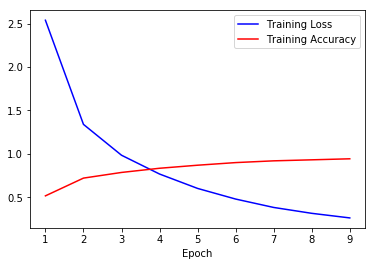

In [26]:
plt.clf()

loss = history.history['loss']
acc = history.history['acc']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

#### 👇计算完全随机精度

In [28]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19100623330365094

#### 👇在新数据上生成预测结果

In [29]:
predictions = model.predict(x_test)

In [31]:
predictions[0].shape

(46,)

In [32]:
np.sum(predictions[0])

0.99999994

In [33]:
np.argmax(predictions[0])

3